# 决策树

In [209]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import os

In [210]:
df = pd.read_csv('D1.data', header=None)

In [211]:
df.shape

(1728, 7)

In [212]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [213]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [214]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [216]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())   


med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64
med      432
high     432
low      432
vhigh    432
Name: maint, dtype: int64
4        432
2        432
3        432
5more    432
Name: doors, dtype: int64
4       576
2       576
more    576
Name: persons, dtype: int64
med      576
small    576
big      576
Name: lug_boot, dtype: int64
med     576
high    576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [217]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [218]:
#缺失值处理
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [219]:
X = df.drop(['class'], axis=1)

y = df['class']

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [221]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [222]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [223]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

C:\Users\Amand\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [224]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [225]:
X_test.head()


,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


In [226]:
encoder = ce.OrdinalEncoder(cols=['class'])
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

C:\Users\Amand\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [227]:
y_train.head()

,class
107,1
901,1
1709,1
706,1
678,1


In [228]:
# 定义绘制混淆矩阵
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest',cmap="Blues")    # 在特定的窗口上显示图像
    plt.title(title,fontsize = 15)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label',fontsize = 15) 
    plt.tick_params(labelsize=15)
    plt.xlabel('Predicted label',fontsize = 15)

In [229]:
class Node(object):
    def __init__(self, x=None, label=None, y=None, data=None):
        self.label = label   # label:子节点分类依据的特征
        self.x = x           # x:特征
        self.child = []      # child:子节点
        self.y = y           # y:类标记（叶节点才有）
        self.data = data     # data:包含数据（叶节点才有）

    def append(self, node):  # 添加子节点
        self.child.append(node)

    def predict(self, features):  # 预测数据所述类
        if self.y is not None:
            return self.y
        for c in self.child:
            if c.x == features[self.label]:
                return c.predict(features)


def printnode(node, depth=0):  # 打印树所有节点
    if node.label is None:
        print(depth, (node.label, node.x, node.y, len(node.data)))
    else:
        print(depth, (node.label, node.x))
        for c in node.child:
            printnode(c, depth+1)


class DTreeID3(object):
    def __init__(self, epsilon=0, alpha=0):
        # 信息增益阈值
        self.epsilon = epsilon
        self.alpha = alpha
        self.tree = Node()

    # 求概率
    def prob(self, datasets):
        datalen = len(datasets)
        labelx = set(datasets)
        p = {l: 0 for l in labelx}
        for d in datasets:
            p[d] += 1
        for i in p.items():
            p[i[0]] /= datalen
        return p

    # 求数据集的熵
    def calc_ent(self, datasets):
        p = self.prob(datasets)
        value = list(p.values())
        return -np.sum(np.multiply(value, np.log2(value)))

    # 求条件熵
    def cond_ent(self, datasets, col):
        labelx = set(datasets.iloc[col])
        p = {x: [] for x in labelx}
        for i, d in enumerate(datasets.iloc[-1]):
            p[datasets.iloc[col][i]].append(d)
        return sum([self.prob(datasets.iloc[col])[k] * self.calc_ent(p[k]) for k in p.keys()])


    # 求信息增益
    def info_gain_train(self, datasets, datalabels):
        datasets = datasets.T
        ent = self.calc_ent(datasets.iloc[-1])
        gainmax = {}
        for i in range(len(datasets) - 1):
            cond = self.cond_ent(datasets, i)
            gainmax[ent - cond] = i
        m = max(gainmax.keys())
        return gainmax[m], m


    def train(self, datasets, node):
        labely = datasets.columns[-1]
        # 判断样本是否为同一类输出Di，如果是则返回单节点树T。标记类别为Di
        if len(datasets[labely].value_counts()) == 1:
            node.data = datasets[labely]
            node.y = datasets[labely][0]
            return
        # 判断特征是否为空，如果是则返回单节点树T，标记类别为样本中输出类别D实例数最多的类别
        if len(datasets.columns[:-1]) == 0:
            node.data = datasets[labely]
            node.y = datasets[labely].value_counts().index[0]
            return
        # 计算A中的各个特征（一共n个）对输出D的信息增益，选择信息增益最大的特征Ag。
        gainmaxi, gainmax = self.info_gain_train(datasets, datasets.columns)
        # 如果Ag的信息增益小于阈值ε，则返回单节点树T，标记类别为样本中输出类别D实例数最多的类别。
        if gainmax <= self.epsilon:
            node.data = datasets[labely]
            node.y = datasets[labely].value_counts().index[0]
            return
        # 按特征Ag的不同取值Agi将对应的样本输出D分成不同的类别Di。每个类别产生一个子节点。对应特征值为Agi。返回增加了节点的数T。
        vc = datasets[datasets.columns[gainmaxi]].value_counts()
        for Di in vc.index:
            node.label = gainmaxi
            child = Node(Di)
            node.append(child)
            new_datasets = pd.DataFrame([list(i) for i in datasets.values if i[gainmaxi]==Di], columns=datasets.columns)
            self.train(new_datasets, child)

    #训练数据
    def fit(self, datasets):
        self.train(datasets, self.tree)

    # 找到所有节点
    def findleaf(self, node, leaf):
        for t in node.child:
            if t.y is not None:
                leaf.append(t.data)
            else:
                for c in node.child:
                    self.findleaf(c, leaf)

    def findfather(self, node, errormin):
        if node.label is not None:
            cy = [c.y for c in node.child]
            if None not in cy:  # 全是叶节点
                childdata = []
                for c in node.child:
                    for d in list(c.data):
                        childdata.append(d)
                childcounter = Counter(childdata)

                old_child = node.child  # 剪枝前先拷贝一下
                old_label = node.label
                old_y = node.y
                old_data = node.data

                node.label = None  # 剪枝
                node.y = childcounter.most_common(1)[0][0]
                node.data = childdata

                error = self.c_error()
                if error <= errormin:  # 剪枝前后损失比较
                    errormin = error
                    return 1
                else:
                    node.child = old_child  # 剪枝效果不好，则复原
                    node.label = old_label
                    node.y = old_y
                    node.data = old_data
            else:
                re = 0
                i = 0
                while i < len(node.child):
                    if_re = self.findfather(node.child[i], errormin)  # 若剪过枝，则其父节点要重新检测
                    if if_re == 1:
                        re = 1
                    elif if_re == 2:
                        i -= 1
                    i += 1
                if re:
                    return 2
        return 0

    def c_error(self):  # 求C(T)
        leaf = []
        self.findleaf(self.tree, leaf)
        leafnum = [len(l) for l in leaf]
        ent = [self.calc_ent(l) for l in leaf]
        print("Ent:", ent)
        error = self.alpha*len(leafnum)
        for l, e in zip(leafnum, ent):
            error += l*e
        print("C(T):", error)
        return error

    def cut(self, alpha=0):  # 剪枝
        if alpha:
            self.alpha = alpha
        errormin = self.c_error()
        self.findfather(self.tree, errormin)

In [235]:
df = np.column_stack((X_train,y_train))
train_data = pd.DataFrame(df, columns=col_names)
    
dt = DTreeID3(epsilon=0)  # 可修改epsilon查看预剪枝效果
dt.fit(train_data)
    
print('DTree:')
printnode(dt.tree)
    
y_pred = []
x_test = np.array(X_test)
for i in range (0,len(x_test)):
    x = dt.tree.predict(x_test[i])
    if not x:
        x = np.random.randint(0,3)
    y_pred.append(x)
        


DTree:
0 (5, None)
1 (None, 3, 1, 469)
1 (3, 2)
2 (0, 2)
3 (4, 4)
4 (None, 2, 1, 16)
4 (1, 1)
5 (None, 2, 2, 4)
5 (None, 3, 2, 4)
5 (None, 1, 1, 3)
5 (None, 4, 2, 3)
4 (2, 3)
5 (None, 2, 1, 4)
5 (None, 4, 1, 4)
5 (None, 1, 2, 3)
5 (1, 3)
6 (None, 1, 1, 1)
6 (None, 2, 2, 1)
3 (1, 2)
4 (None, 3, 2, 11)
4 (4, 4)
5 (None, 1, 2, 4)
5 (2, 3)
6 (None, 1, 2, 1)
6 (None, 2, 1, 1)
6 (None, 3, 2, 1)
6 (None, 4, 1, 1)
5 (None, 2, 1, 3)
4 (4, 1)
5 (None, 1, 2, 4)
5 (None, 2, 1, 3)
5 (2, 3)
6 (None, 4, 1, 1)
6 (None, 1, 2, 1)
6 (None, 2, 1, 1)
4 (4, 2)
5 (None, 1, 4, 4)
5 (None, 2, 2, 2)
5 (None, 3, 4, 1)
3 (1, 1)
4 (4, 3)
5 (None, 2, 1, 4)
5 (2, 3)
6 (None, 1, 2, 1)
6 (None, 2, 1, 1)
6 (None, 3, 2, 1)
6 (None, 4, 1, 1)
5 (None, 1, 2, 3)
4 (None, 1, 1, 9)
4 (4, 2)
5 (2, 3)
6 (None, 1, 2, 1)
6 (None, 2, 1, 1)
6 (None, 3, 2, 1)
6 (None, 4, 1, 1)
5 (None, 2, 1, 3)
5 (None, 1, 2, 2)
4 (None, 4, 1, 9)
3 (1, 3)
4 (4, 3)
5 (None, 2, 2, 4)
5 (None, 1, 4, 3)
5 (2, 3)
6 (None, 1, 4, 1)
6 (None, 2, 2, 1)
6 (No

In [239]:
print(y_pred)



[1, 4, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 4, 1, 2, 1, 2, 2, 1, 1, 1, 4, 1, 2, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 

In [241]:
acc = 0
cnt = 0
y_test = np.array(y_test)
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        cnt = cnt+1
        print("第%d组数据预测错误 test:%d predict: %d"%(i,y_test_[i],y_pred[i]))
print(1-cnt/len(y_test_))


第1组数据预测错误 test:0 predict: 4
第8组数据预测错误 test:0 predict: 2
第10组数据预测错误 test:0 predict: 2
第12组数据预测错误 test:0 predict: 2
第30组数据预测错误 test:0 predict: 1
第35组数据预测错误 test:0 predict: 4
第44组数据预测错误 test:0 predict: 1
第45组数据预测错误 test:0 predict: 1
第52组数据预测错误 test:0 predict: 1
第61组数据预测错误 test:0 predict: 1
第64组数据预测错误 test:0 predict: 1
第74组数据预测错误 test:0 predict: 0
第84组数据预测错误 test:0 predict: 0
第88组数据预测错误 test:0 predict: 1
第89组数据预测错误 test:0 predict: 0
第91组数据预测错误 test:0 predict: 0
第104组数据预测错误 test:0 predict: 4
第105组数据预测错误 test:0 predict: 0
第115组数据预测错误 test:0 predict: 1
第116组数据预测错误 test:0 predict: 3
第121组数据预测错误 test:0 predict: 1
第126组数据预测错误 test:0 predict: 4
第132组数据预测错误 test:0 predict: 4
第137组数据预测错误 test:0 predict: 0
第141组数据预测错误 test:0 predict: 0
第150组数据预测错误 test:0 predict: 1
第162组数据预测错误 test:0 predict: 2
第169组数据预测错误 test:0 predict: 1
第212组数据预测错误 test:0 predict: 1
第219组数据预测错误 test:0 predict: 3
第223组数据预测错误 test:0 predict: 1
第277组数据预测错误 test:0 predict: 1
第278组数据预测错误 test:0 predict: 4
第286组数据预测错误 test:0 predict: 

car决策树：
 [[  0   0   0   0   0]
 [  0 232   3   0   0]
 [  4  12  60   1   6]
 [  2   4   1  10   0]
 [  2   1   0   1   7]]


<ipython-input-228-ba9a87c4022c>:3: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化


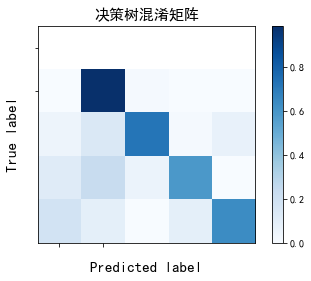

In [243]:
y_test = np.array(y_test)
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
plt.rcParams['font.sans-serif'] = ['SimHei']
c_matrix_tree = confusion_matrix(y_test, y_pred)
print("car决策树：\n",c_matrix_tree)
plot_confusion_matrix(c_matrix_tree, [' ',' '], "决策树混淆矩阵")
plt.show()

In [248]:
from pycm import *

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
print(cm)

Predict   0         1         2         3         4         [1]       [2]       [3]       [4]       
Actual
0         0         0         0         0         0         0         0         0         0         

1         0         0         0         0         0         0         0         0         0         

2         0         0         0         0         0         0         0         0         0         

3         0         0         0         0         0         0         0         0         0         

4         0         0         0         0         0         0         0         0         0         

[1]       0         232       3         0         0         0         0         0         0         

[2]       4         12        60        1         6         0         0         0         0         

[3]       2         4         1         10        0         0         0         0         0         

[4]       2         1         0         1         7         0         0     